In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline


In [22]:
df = pd.read_csv("customer-churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df.shape

(7043, 21)

In [24]:
## dropping id
df.drop('customerID', axis = 'columns', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [25]:
## checking why is monthly charges a float but total charges of object type?
df.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [26]:
## converting tsring to float
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [27]:
## got an error bcz there are some values that has space in it
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce') # this will convert all the non-convertible to NaN and rest to numbers

In [28]:
df.TotalCharges.isnull().sum()

11

In [31]:
## we can simply drop these 11 rows
df1 = df.dropna(subset=['TotalCharges'], inplace=False)
df1.shape

(7032, 20)

In [33]:
## NOW AFTER REMOVING SPACES WE WILL CONVERT IT TO NUMERIC
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\USER\AppData\Local\Temp\ipykernel_8404\1081177742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [34]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
### EDA

In [37]:
## getting custormers with churn = 'NO' and checking their tenure
no_churn_tenure = df1[df1['Churn']=='No'].tenure

In [40]:
yes_churn_tenure = df1[df1['Churn']=='Yes'].tenure

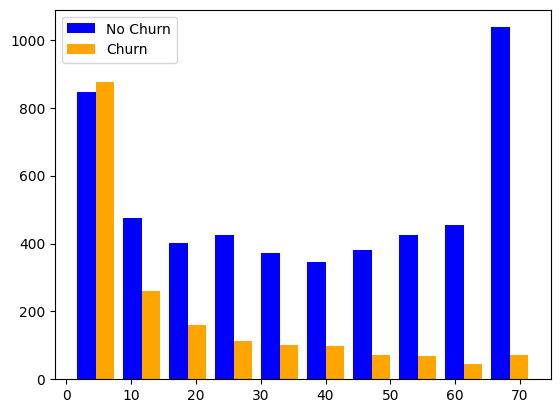

In [46]:
plt.hist([no_churn_tenure, yes_churn_tenure], color=['blue', 'orange'], label=['No Churn', 'Churn'])
plt.legend()

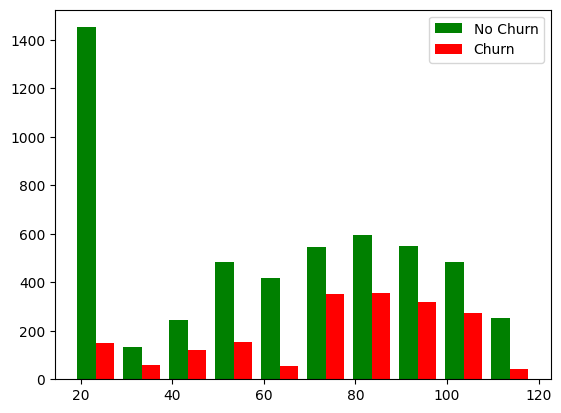

In [48]:
## churn and monthly charge
no_churn_mc = df1[df1['Churn']=='No'].MonthlyCharges
yes_churn_mc = df1[df1['Churn']=='Yes'].MonthlyCharges

plt.hist([no_churn_mc, yes_churn_mc], color=['green', 'red'], label=['No Churn', 'Churn'])
plt.legend()

In [49]:
## checking all unique values in object type columns
def print_unique(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {(df[column].unique())}')

In [50]:
print_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [51]:
df1.replace('No phone service', 'No', inplace = True)
df1.replace('No internet service', 'No', inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8404\2263690950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8404\2263690950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace = True)


In [52]:
print_unique(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [54]:
## yes/no = 1/0
yes_no_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
              'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn' ]

for col in yes_no_cols:
    df1[col].replace({'Yes' : 1 , 'No' : 0}, inplace = True)

C:\Users\USER\AppData\Local\Temp\ipykernel_8404\737022566.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes' : 1 , 'No' : 0}, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8404\737022566.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes'

In [55]:
print_unique(df1)

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [56]:
## gender
df1['gender'].replace({'Female' :1, "Male": 0}, inplace = True)
print_unique(df1)

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


C:\Users\USER\AppData\Local\Temp\ipykernel_8404\2304709899.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female' :1, "Male": 0}, inplace = True)
C:\Users\USER\AppData\Local\Temp\ipykernel_8404\2304709899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female' :1, "Male": 0}, inplace = True)


In [61]:
## for cols with more than 2 categories, we one hot encode
df2 = pd.get_dummies(data = df1, columns=['InternetService','Contract','PaymentMethod'], dtype = int)
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [62]:
df2.shape

(7032, 27)

In [63]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [75]:
## scaling needed bcz almost all cols are 0,1 but tenure and charges
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']
import sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [76]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [77]:
## train test split
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [79]:
X_train.shape

(5625, 26)

In [80]:
X_test.shape

(1407, 26)

In [81]:
import tensorflow as tf 
from tensorflow import keras 

model = keras.Sequential([
    keras.layers.Dense(20, input_shape = (26,), activation='relu'),
    keras.layers.Dense(1, activation ='sigmoid'),

])

In [82]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [85]:
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5194 - accuracy: 0.7852
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7787
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7835
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.7685
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.7503 - accuracy: 0.7694
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5562 - accuracy: 0.7801
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.5873 - accuracy: 0.7753
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.7575 - accuracy: 0.7707
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.7739
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.7246 - accura

In [86]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 4ms/step - loss: 0.5053 - accuracy: 0.7925


[0.5053484439849854, 0.7924662232398987]

In [87]:
from sklearn.metrics import confusion_matrix, classification_report 

print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined